## <font color=#458B74>The goal of this project is to gruop customers in different categories for the profit of the business.</font>

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
#loading the data
customers_data=pd.read_csv('Mall_Customers.csv')
customers_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## <font color=#FF4040>EDA</font>

In [3]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
print(customers_data.Gender.value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

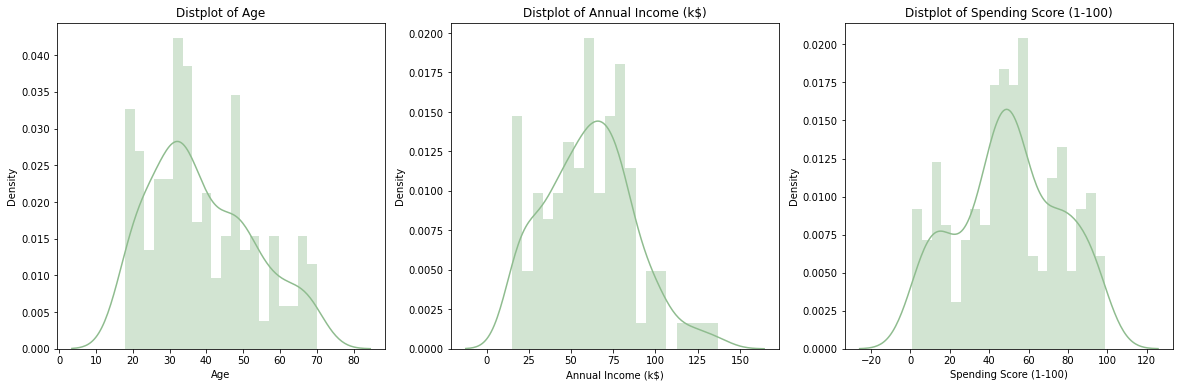

In [5]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    sns.distplot(customers_data[x],bins=20,color='#8FBC8F',ax=ax[n])
    ax[n].set_title('Distplot of {}'.format(x))
    n+=1;

In [10]:
#taking annual income and spending score as inputs
X= customers_data.iloc[:,[3,4]].values

### Choosing the number of clusters 

In [11]:
#finding within cluster sum of squares(WCSS)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=4)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

C:\Users\91775\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30259.657207285458, 25061.264092290665, 21964.472678238846, 19641.456216651564]


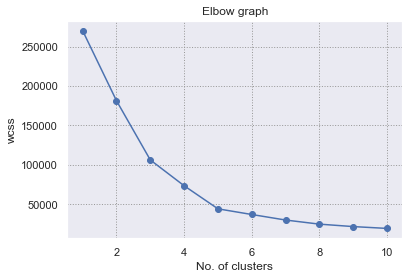

In [27]:
#plotting the elbow graph
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(1,11),wcss,"o-b")
plt.title("Elbow graph")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show();

After 5 there is not much difference,so 5 will be optimum no. of clusters.

### Model building

In [29]:
classifier = KMeans(n_clusters=5,init="k-means++",random_state=4)
clusters = classifier.fit_predict(X)

In [30]:
clusters

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

### <font color=#DB7093> Visualizing the Clusters</font>

C:\Users\91775\AppData\Local\Temp/ipykernel_3668/2203126573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['labels'] = labels


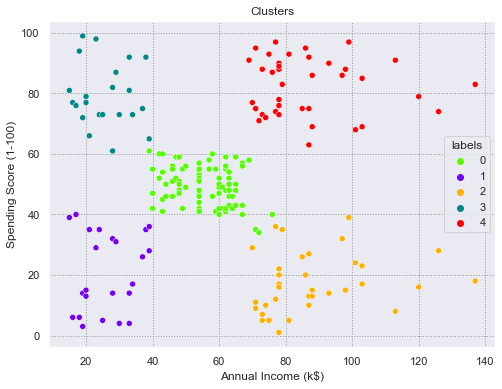

In [60]:
labels = classifier.labels_
centroids = classifier.cluster_centers_
new_data = customers_data[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:]
new_data['labels'] = labels
plt.figure(figsize=(8,6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=new_data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='labels',palette='prism_r')
plt.title("Clusters")
plt.show();

#### Another way

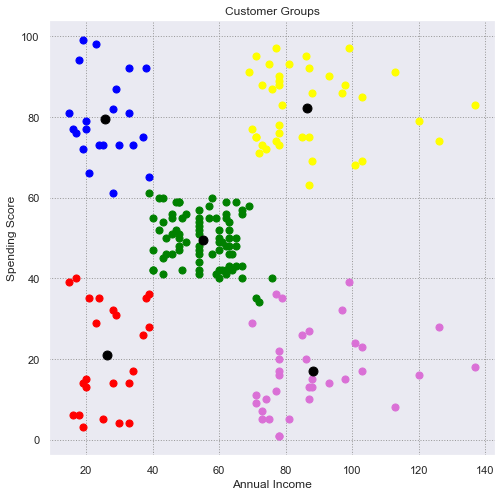

In [65]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[clusters==0,0], X[clusters==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[clusters==1,0], X[clusters==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[clusters==2,0], X[clusters==2,1], s=50, c='orchid', label='Cluster 3')
plt.scatter(X[clusters==3,0], X[clusters==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[clusters==4,0], X[clusters==4,1], s=50, c='yellow', label='Cluster 5')

# plot the centroids
plt.scatter(classifier.cluster_centers_[:,0], classifier.cluster_centers_[:,1], s=80, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()